In [1]:
# Importing the requirments
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score

There are total of steps:
1. ***Data Collection***
2. ***Data Analysis and Visulization***
3. ***Correlation between columns***
4. ***Data Preprocessing***
5. ***Train and Test Data Split***
6. ***Model Training***
7. ***Model Evaluation***
8. ***Building a Predictive System***

# ***Data Collection***

In [2]:
# Taking the data using pandas
wine_ds = pd.read_csv("./winequality.csv")

In [3]:
# Check num of rows and columns
wine_ds.shape

(1599, 12)

1599 - Different wine mixtures

12 - Different chemicals used i.e the names of the chemicals of wine mixtures

In [4]:
# First 5 rows of dataset
wine_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Checking for missing values in the table
wine_ds.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Checking for missing values in sum
wine_ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# ***Data Analysis and Visulization***

In [7]:
# All Statisitical measures of the dataset
wine_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


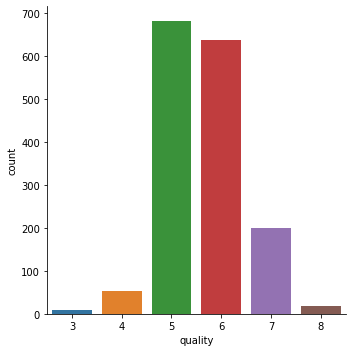

In [8]:
# number of values of each quality
sns.catplot(x='quality',data=wine_ds,kind='count')

Comparing columns to know which columns affect the quality

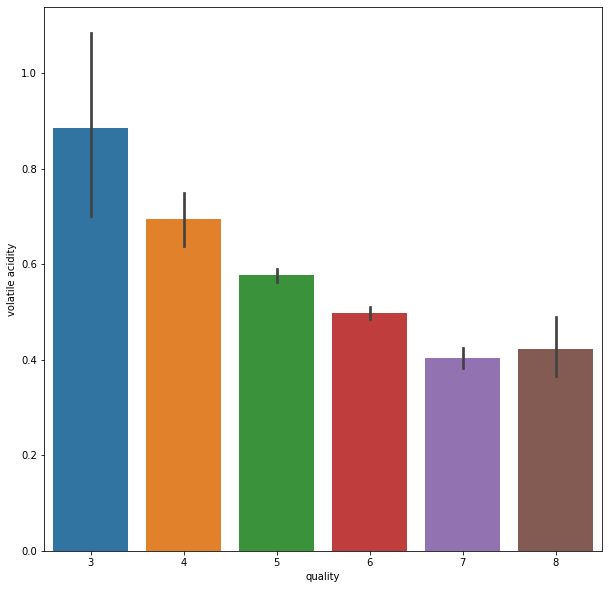

In [9]:
# Volatile acidity & Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x="quality",y="volatile acidity",data=wine_ds)

***Here the higher the volatile acidity the lower the quality.***

***So the volatile acidity is inversly propotional to quality***

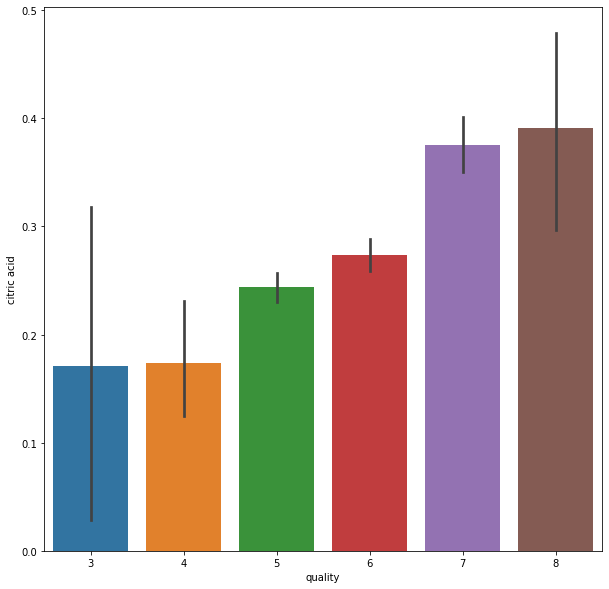

In [10]:
# Citric acid & Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x="quality",y="citric acid",data=wine_ds)

***Here the higher the Citric Acid the higher the quality.***

***So the Citric Acid is directly propotional to quality***

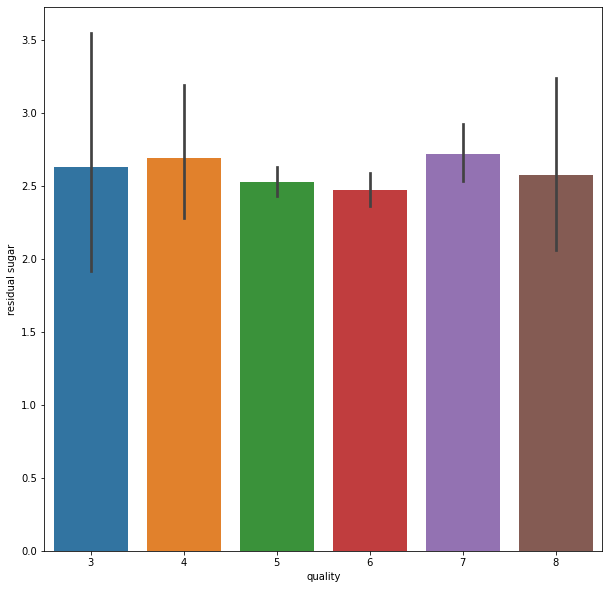

In [11]:
# residual sugar & Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x="quality",y="residual sugar",data=wine_ds)

***So the realtion cannot be identified***




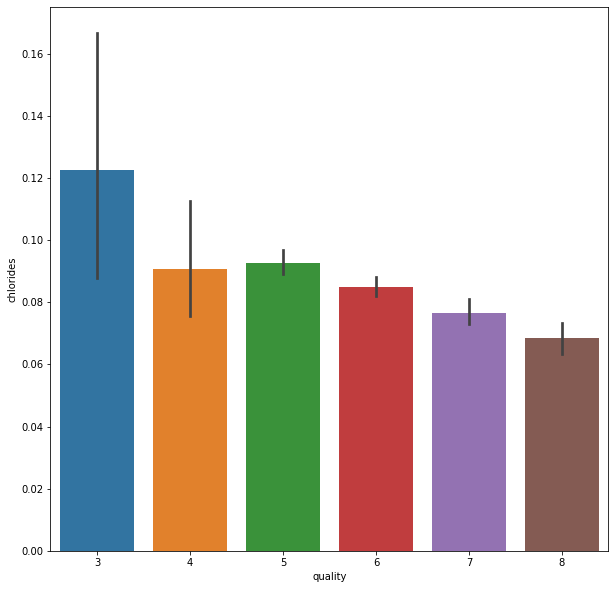

In [12]:
# chlorides & Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x="quality",y="chlorides",data=wine_ds)


***Here the higher the Chlorides the lower the quality.***

***So the Chlorides is inversly propotional to quality***

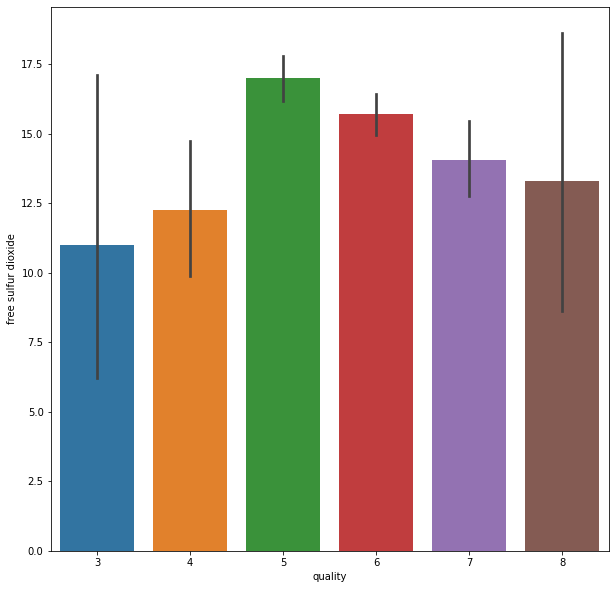

In [13]:
# free sulfur dioxide & Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x="quality",y="free sulfur dioxide",data=wine_ds)

***So the realtion cannot be identified***

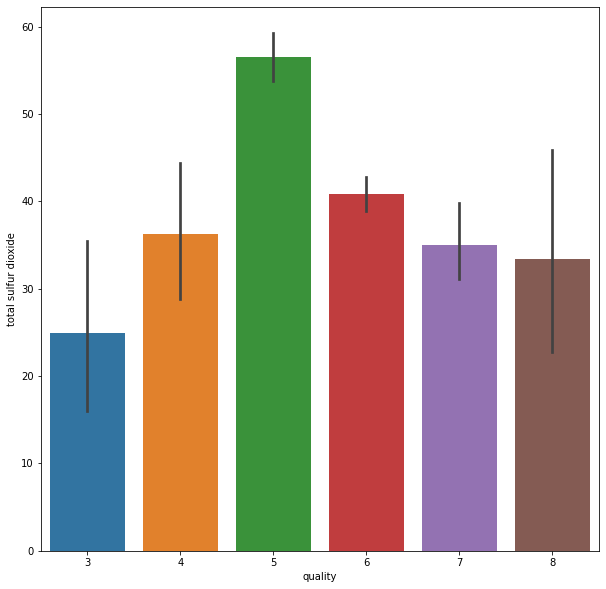

In [14]:
# total sulfur dioxide	 & Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x="quality",y="total sulfur dioxide",data=wine_ds)

***So the realtion cannot be identified***

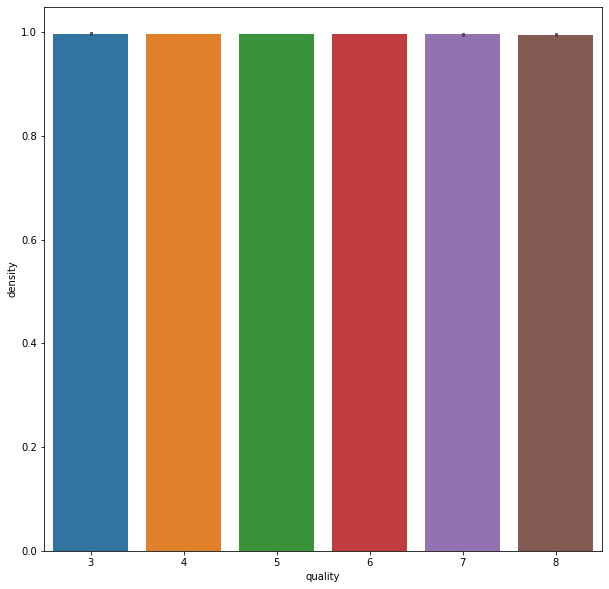

In [15]:
# density& Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x="quality",y="density",data=wine_ds)

***quality == Density***

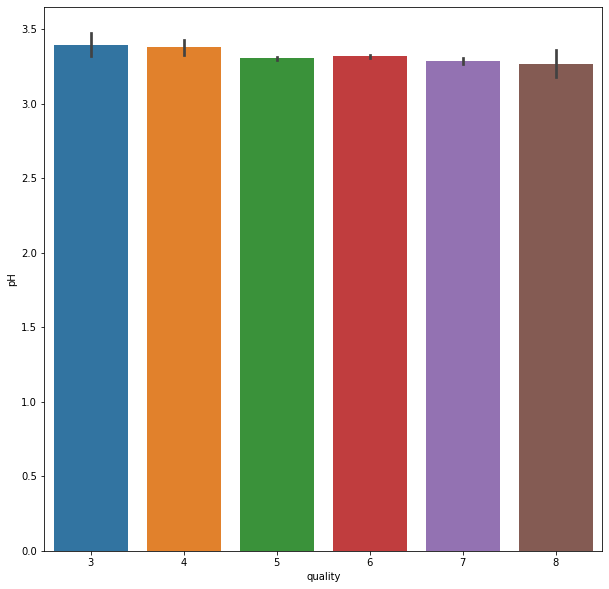

In [16]:
# pH & Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x="quality",y="pH",data=wine_ds)


***Here the higher the pH the lower the quality.***

***So the pH is inversly propotional to quality***

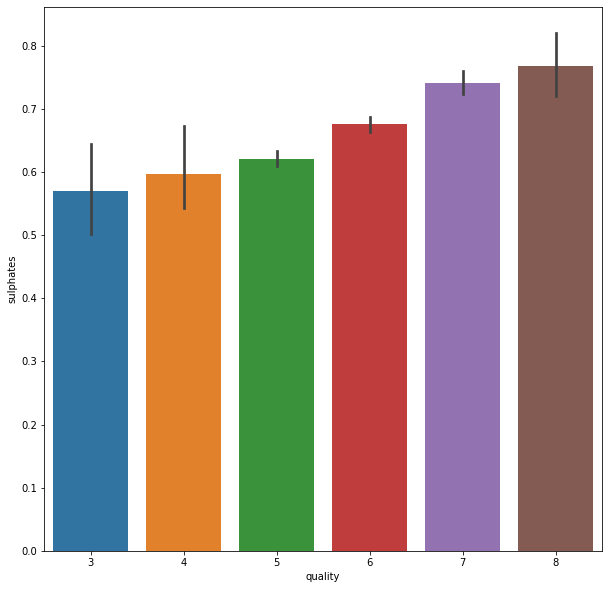

In [17]:
# sulphates & Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x="quality",y="sulphates",data=wine_ds)

***Here the higher the Sulphates the higher the quality.***

***So the Sulphates is directly propotional to quality***

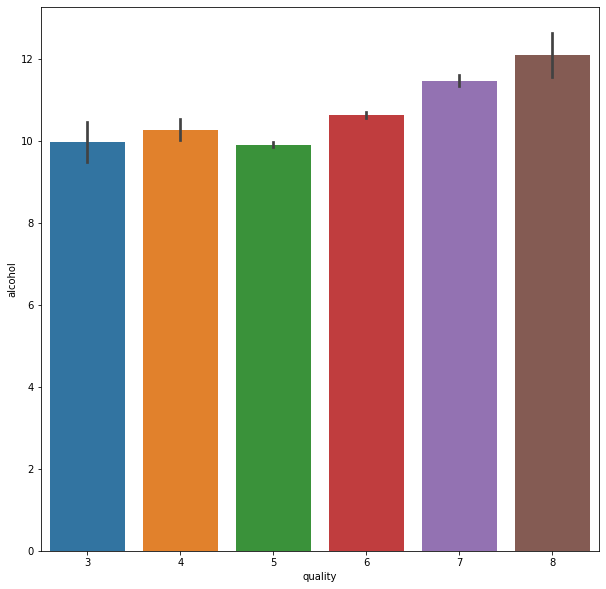

In [18]:
# alcohol & Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x="quality",y="alcohol",data=wine_ds)

***Here the higher the Sulphates the higher the quality.***

***So the Sulphates is directly propotional to quality***

# ***Correlation between columns***

In [19]:
correlation = wine_ds.corr()

Postive vs negative correlation

1.   Postive - Directly proptional
2.   Negative - Inversly Proptional



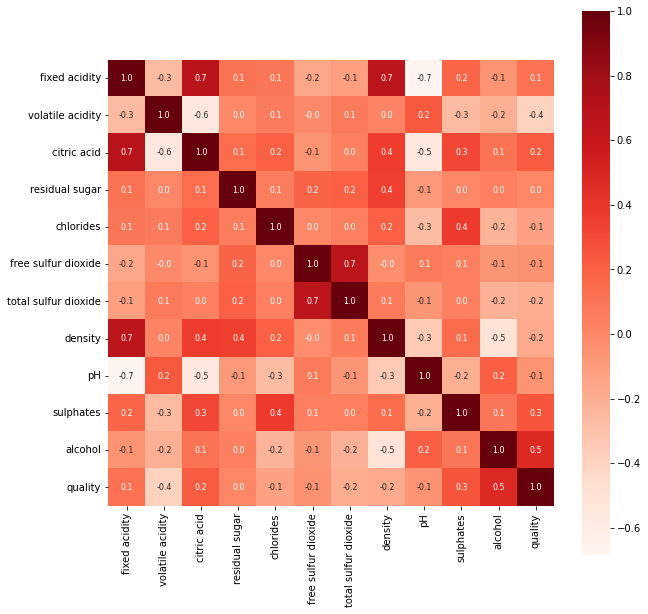

In [20]:
# Designing heat map between columns to find correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar = True,square = True,fmt=".1f",annot=True,annot_kws={'size':8}, cmap = 'Reds')

# ***Data Preprocessing***

In [21]:
# Seperate the data and label
X = wine_ds.drop('quality',axis=1)

In [22]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

Label Binarization - jist converting the values into 2 
1.   quality is greater than or equal to 6 it is good
2.   quality is less than 6 it is bad

In [23]:
Y = wine_ds['quality'].apply(lambda y_value: 1 if y_value>6 else 0)

In [24]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


# **Train and Test Data Split**

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.2,random_state=2)

In [26]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (319,) (1280,)


# **Model Training**

***Random Forest Classifier***

In [27]:
model = rfc()

In [28]:
model.fit(X_train.values,Y_train)

RandomForestClassifier()

# **Model Evaluation**
***Acuuracy Score***

In [29]:
# Accuracy on test data
X_test_predict = model.predict(X_test.values)
test_accuracy = accuracy_score(X_test_predict,Y_test)

In [30]:
print("Accuracy of the test data :" , test_accuracy)

Accuracy of the test data : 0.88671875


# **Building a Predictive System**

In [31]:
input_data = [10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6]
# Chaning the input data to input_array
input_array = np.asarray(input_data)
# Reshaping the data for only one instance
input_reshape = input_array.reshape(1,-1)
predict = model.predict(input_reshape)
if predict == 0:
    print("Bad one")
else:
    print("Good one")

Good one
